In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv('foodTruck.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


#### Population is the predictor variable
#### Profit is the target variable

In [5]:
temp=df.population
X=np.array(temp)

temp=df.profit
Y=temp.to_numpy()

## Part 1 Use the Normal Equation to estimate the coeficients of linear model
### Linear algebra functions can be found in np.linalg like np.linalg.inv for matrix inverse function
### $\beta = (X^T X)^{-1} X^Ty $
#### DO NOT use the SKlearn library


#### 1- Plot your data using the scatter or the plot function from matplotlib library

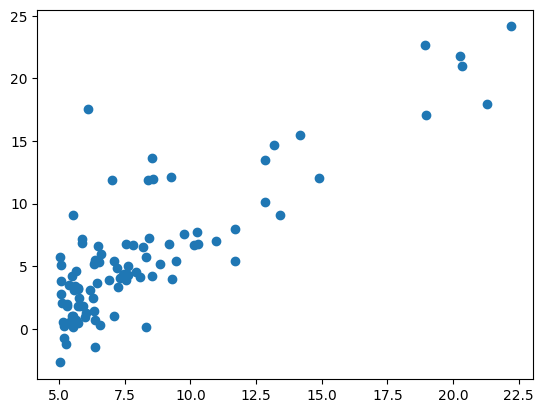

In [6]:
plt.scatter(X,Y)



#### 2- Estimate the coefficients of the linear model using the normal equation formula

#### Make sure the dimensions are compatible 
#### Print the coeficients

In [7]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTy = np.dot(X.T, y)
beta = np.dot(XTX_inv, XTy)
print('Intercept:', beta[0])
print('Slope:', beta[1])



Intercept: [-3.89578088]
Slope: [1.19303364]


#### Using the coeficients you estimated , predict the Y values for X values 5 and 23

In [8]:
population_1 = 5
population_2 = 23
profit_1 = beta[0] + beta[1]*population_1
profit_2 = beta[0] + beta[1]*population_2
print('For a population of 5, the predicted profit is:', profit_1)
print('For a population of 23, the predicted profit is:', profit_2)

For a population of 5, the predicted profit is: [2.06938734]
For a population of 23, the predicted profit is: [23.54399294]


#### Plot the data
#### Plot the model
#### Don't forget to label the axes

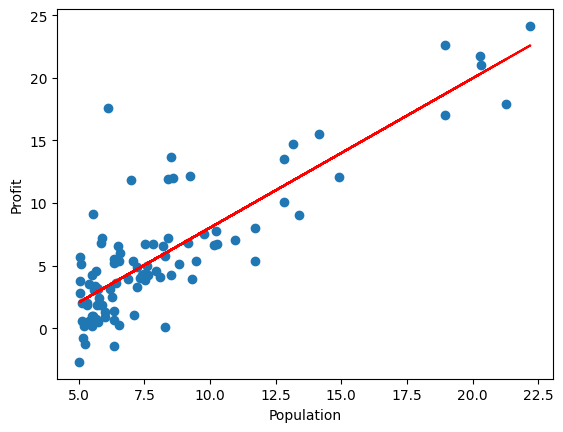

In [9]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, beta), color='red')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

#### Calculate R square using the equation we discussed in class

In [10]:
y_pred = np.dot(X, beta)
TSS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y - y_pred)**2)
r_squared = 1 - RSS/TSS
print('R-squared:', r_squared)

R-squared: 0.7020315537841397


## Part 2: Use gradient descent to estimate the coeficients of linear model
#### DO NOT use the SKlearn library

### Write a function computeCost that measures the Mean square error of a particular set of coefficients
### taking as input vector beta that contains those coeficients, the predictor and target variable and returning the cost
### $J(\beta ) = -\sum_{i=1}^m(f(x)-y_i)^2$
### $J(\beta ) = \frac {1} {m} (X \beta -y)^T (X \beta -y)$


In [11]:
def computeCost(x,y,beta):
    m = len(y)
    cost = np.sum((np.dot(X, beta) - y)**2)/(2*m)
    
    return cost;

### Write a function gradientDescent that uses the algorithm discussed in class and iteratively estimates the coefficients of the linear model

#### Repeat until convergence{
####         $\beta_j = \beta_j -\alpha \frac{1}{m} \sum_{i=1}^m((f(x_i) - y_i).x_j)$
####       for j =0,..n }
#### update coeficients sumiltaneously

In [12]:
def gradientDescent(X, y, beta, alpha, iters):
    m = len(y)
    cost_history = np.zeros((iters, 1))
    for i in range(iters):
        h = np.dot(X, beta)
        for j in range(len(beta)):
            beta[j] = beta[j] - alpha*(np.sum((h - y)*X[:,j].reshape(-1, 1))/m)
        cost_history[i] = computeCost(X, y, beta)
    return beta, cost_history

#### Initialize the values of beta use these initial values to run the gradient descent function
#### Make sure the dimensions are compatible 
#### print the coeficients estimated using gradient descent

In [13]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))
alpha = 0.01
iters = 1000
beta = np.zeros((2, 1))
beta, cost_history = gradientDescent(X, y, beta, alpha, iters)
print('Intercept:', beta[0])
print('Slope:', beta[1])
print('Final Cost:', cost_history[-1])

Intercept: [-3.24140214]
Slope: [1.1272942]
Final Cost: [4.5159555]


#### Plot the data
#### Plot the model
#### Don't forget to label the axes

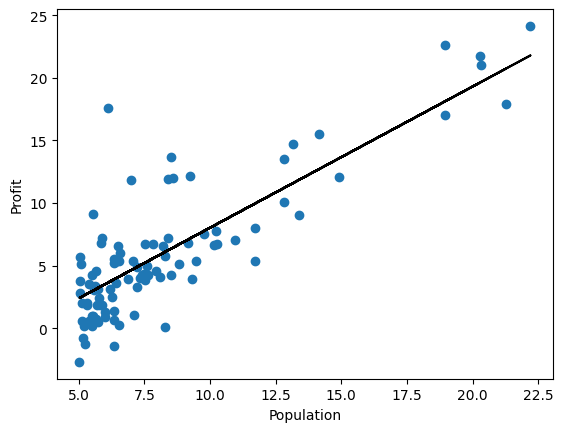

In [14]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], np.dot(X, beta), color='black')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

#### Plot the cost history as a function of the iterations
#### cost history on the y axis, iteration number on the x axis
#### Don't forget to label the axes

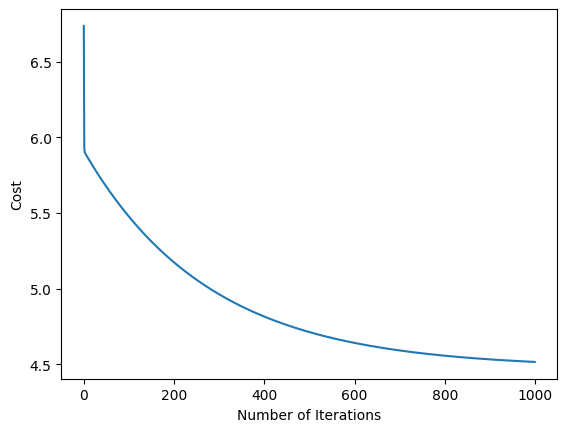

In [15]:
plt.plot(cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

## Part 3: Use the SKlearn library to estimate the coefficients of a linear regression model
### use your research skills to implement this part

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a Pandas DataFrame
df = pd.read_csv('foodTruck.csv')

# Extract the population and profit columns
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)

# Create a LinearRegression object
regressor = LinearRegression()

# Fit the linear regression model to the data
regressor.fit(X, y)

# Print the intercept and slope of the linear regression model
print('Intercept:', regressor.intercept_)
print('Slope:', regressor.coef_[0])

# Predict the profit for a population of 5 and 23
X_test = [[5], [23]]
y_pred = regressor.predict(X_test)
print('Predicted profits:', y_pred)

Intercept: [-3.89578088]
Slope: [1.19303364]
Predicted profits: [[ 2.06938734]
 [23.54399294]]


#### Plot the data
#### Plot the model
#### Don't forget to label the axes

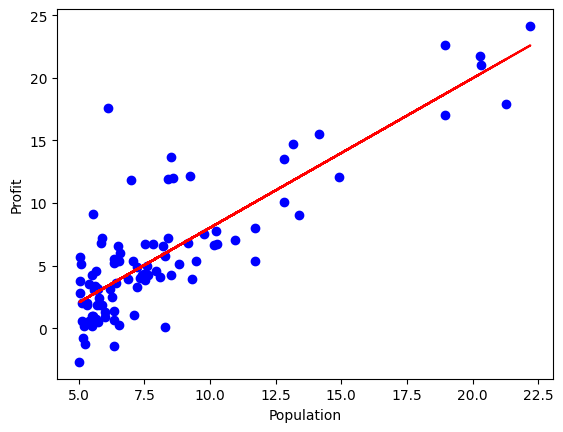

In [18]:
plt.scatter(X, y, color='blue')
plt.xlabel('Population')
plt.ylabel('Profit')

# Plot the linear regression model
plt.plot(X, regressor.predict(X), color='red')
plt.show()